In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import json
import re
import time
import dateutil.parser
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.cross_validation
%matplotlib inline

In [ ]:
def get_train_test_diagnostics(num_models, dmatr_train, dmatr_test):
    model_err = []
    for i in range(num_models):
        xtrain = dmatr_train[i][1]
        ytrain = dmatr_train[i][0]
        xtest = dmatr_test[i][1]
        ytest = dmatr_test[i][0]
        model = sm.OLS(ytrain, xtrain)
        results = model.fit()
        ytrain_predict = results.predict(xtrain)
        ytest_predict = results.predict(xtest)
        d = {'train_err': mean_squared_error(ytrain, ytrain_predict),
             'test_err': mean_squared_error(ytest, ytest_predict),
             'num_pred': i + 1,
             'r_sqr': results.rsquared,
             'r_sqr_adj': results.rsquared_adj,
             'aic': results.aic,
             'bic': results.bic,
             'Fpval': results.f_pvalue,
             'num_obs': results.nobs,
             'coeff': results.params}
        model_err.append(d) 
    return pd.DataFrame(model_err)

In [12]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

# Step 1
Examine scatter plots of key variables against Domestic Total Gross in Millions and agains the log of DTG. Identify the score (or log of score) that has the strongest relationship with DTG.

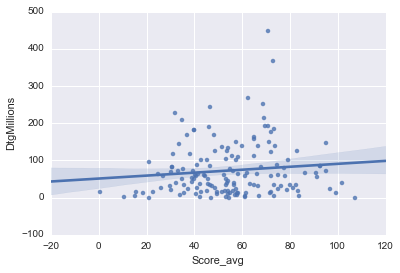

In [98]:
ax = sns.regplot(x="Score_avg", y=("DtgMillions"), data=train)

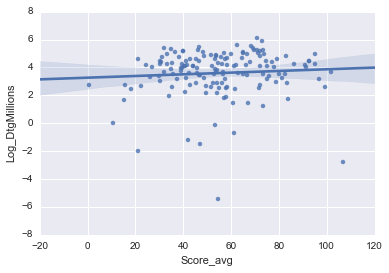

In [99]:
ax = sns.regplot(x="Score_avg", y=("Log_DtgMillions"), data=train)

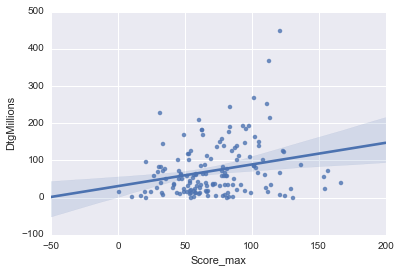

In [101]:
ax = sns.regplot(x="Score_max", y=("DtgMillions"), data=train)

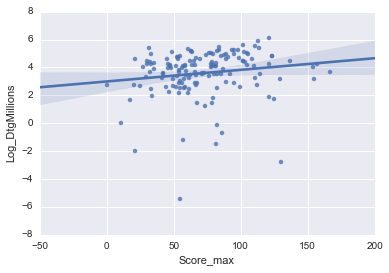

In [100]:
ax = sns.regplot(x="Score_max", y=("Log_DtgMillions"), data=train)

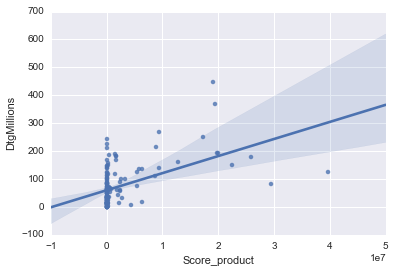

In [102]:
ax = sns.regplot(x="Score_product", y=("DtgMillions"), data=train)

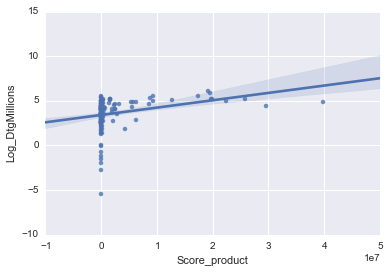

In [103]:
ax = sns.regplot(x="Score_product", y=("Log_DtgMillions"), data=train)

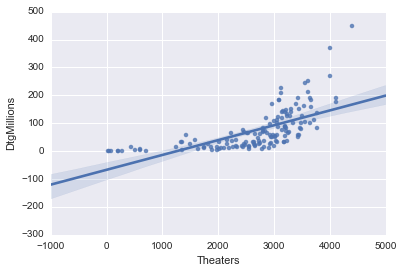

In [105]:
ax = sns.regplot(x="Theaters", y=("DtgMillions"), data=train)

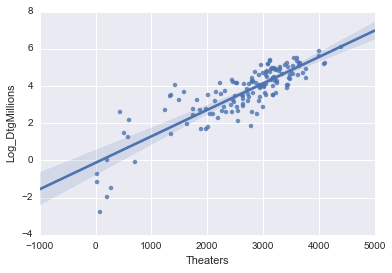

In [104]:
ax = sns.regplot(x="Theaters", y=("Log_DtgMillions"), data=train)

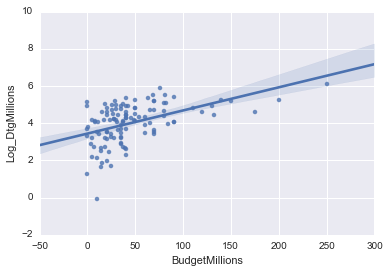

In [106]:
ax = sns.regplot(x="BudgetMillions", y=("Log_DtgMillions"), data=train)

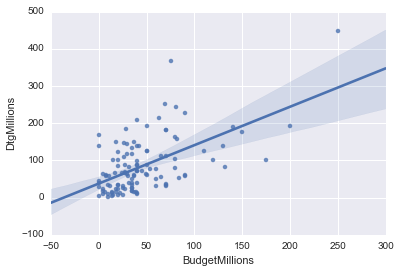

In [107]:
ax = sns.regplot(x="BudgetMillions", y=("DtgMillions"), data=train)

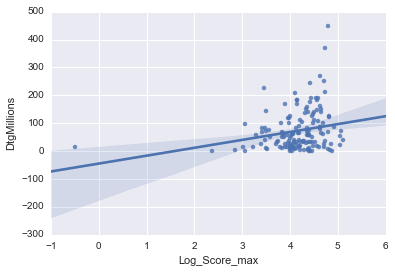

In [108]:
ax = sns.regplot(x="Log_Score_max", y=("DtgMillions"), data=train)

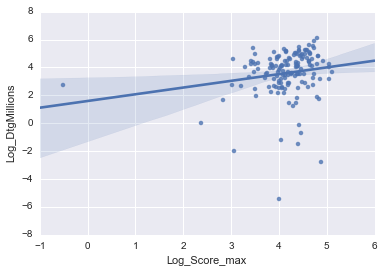

In [109]:
ax = sns.regplot(x="Log_Score_max", y=("Log_DtgMillions"), data=train)

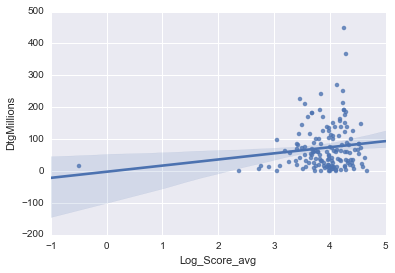

In [111]:
ax = sns.regplot(x="Log_Score_avg", y=("DtgMillions"), data=train)

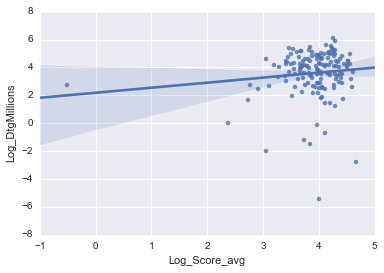

In [112]:
ax = sns.regplot(x="Log_Score_avg", y=("Log_DtgMillions"), data=train)

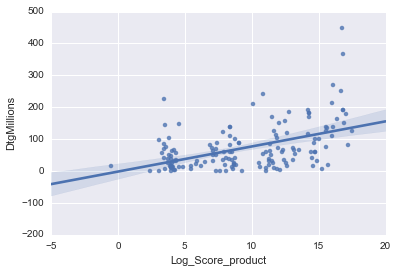

In [114]:
ax = sns.regplot(x="Log_Score_product", y=("DtgMillions"), data=train)

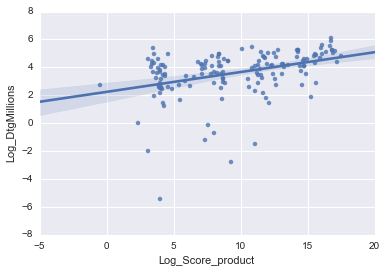

In [115]:
ax = sns.regplot(x="Log_Score_product", y=("Log_DtgMillions"), data=train)

# Step 2
Use patsy to create multiple combinations of independent variables for modeling, starting with just the actor score of the film and adding in additional key variables one at a time. Compare the models with different combinations of x variables based on mean squared error on both the train and test sets and adjusted R-squared.

In [400]:
y0, X0 = dmatrices('DtgMillions ~ Log_Score_product', data = train, return_type = 'dataframe')

In [401]:
y1, X1 = dmatrices('DtgMillions ~ Log_Score_product + BudgetMillions', data = train, return_type = 'dataframe')

In [402]:
y2, X2 = dmatrices('DtgMillions ~ Log_Score_product + BudgetMillions + Theaters', data = train, return_type = 'dataframe')

In [403]:
y3, X3 = dmatrices('DtgMillions ~ Log_Score_product + BudgetMillions + Theaters + ReleaseDays', data = train, return_type = 'dataframe')

In [404]:
y4, X4 = dmatrices('DtgMillions ~ Log_Score_product + BudgetMillions + Theaters + ReleaseDays + RuntimeMins', data = train, return_type = 'dataframe')

In [416]:
y5, X5 = dmatrices('DtgMillions ~ BudgetMillions + Theaters + ReleaseDays + RuntimeMins', data = train, return_type = 'dataframe')

In [406]:
yt0, Xt0 = dmatrices('DtgMillions ~ Log_Score_product', data = test, return_type = 'dataframe')

In [407]:
yt1, Xt1 = dmatrices('DtgMillions ~ Log_Score_product + BudgetMillions', data = test, return_type = 'dataframe')

In [408]:
yt2, Xt2 = dmatrices('DtgMillions ~ Log_Score_product + BudgetMillions + Theaters', data = test, return_type = 'dataframe')

In [409]:
yt3, Xt3 = dmatrices('DtgMillions ~ Log_Score_product + BudgetMillions + Theaters + ReleaseDays', data = test, return_type = 'dataframe')

In [410]:
yt4, Xt4 = dmatrices('DtgMillions ~ Log_Score_product + BudgetMillions + Theaters + ReleaseDays + RuntimeMins', data = test, return_type = 'dataframe')

In [417]:
yt5, Xt5 = dmatrices('DtgMillions ~ BudgetMillions + Theaters + ReleaseDays + RuntimeMins', data = test, return_type = 'dataframe')

In [419]:
train_data = [(y0, X0), (y1, X1), (y2, X2), (y3, X3), (y4, X4), (y5, X5)]
test_data = [(yt0, Xt0), (yt1, Xt1), (yt2, Xt2), (yt3, Xt3), (yt4, Xt4), (yt5, Xt5)]

In [420]:
error = get_train_test_diagnostics(6, train_data, test_data)

In [421]:
error[['r_sqr_adj', 'test_err', 'train_err', 'coeff']]

,r_sqr_adj,test_err,train_err,coeff
0,0.228137,3393.792338,4025.654446,Intercept -1.935817 Log_Score_produc...
1,0.380780,3257.960337,3336.813273,Intercept -0.106550 Log_Score_produc...
2,0.499524,2663.333640,2728.783581,Intercept -92.354478 Log_Score_produ...
3,0.664114,1411.859212,1737.669203,Intercept -96.477977 Log_Score_produ...
4,0.673924,1354.868113,1662.472621,Intercept -169.200442 Log_Score_prod...
5,0.669528,1524.339306,1709.662970,Intercept -164.944846 BudgetMillions ...


In [396]:
xtrain = X4
ytrain = y4
model = sm.OLS(ytrain, xtrain)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DtgMillions   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     31.17
Date:                Thu, 28 Jan 2016   Prob (F-statistic):           2.37e-16
Time:                        15:48:34   Log-Likelihood:                -379.40
No. Observations:                  74   AIC:                             770.8
Df Residuals:                      68   BIC:                             784.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          -169.2004     48.554     -3.485      0.001      -266.089   -72.312
Log_Score_product     1.8938      1.363      1.389      0.169        -0.826     4.614
BudgetMillions        0.4299      0.169      2.543      0.013         0.093     0.767
Theaters              0.0210      0.011      1.896      0.062        -0.001     0.043
ReleaseDays           0.7409      0.147      5.031      0.000         0.447     1.035
RuntimeMins           0.7800      0.445      1.754      0.084        -0.107     1.667
==============================================================================
Omnibus:                        9.699   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.432
Skew:                           0.793   Prob(JB):                      0.00895
Kurtosis:                       3.738   Cond. No.                     2.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

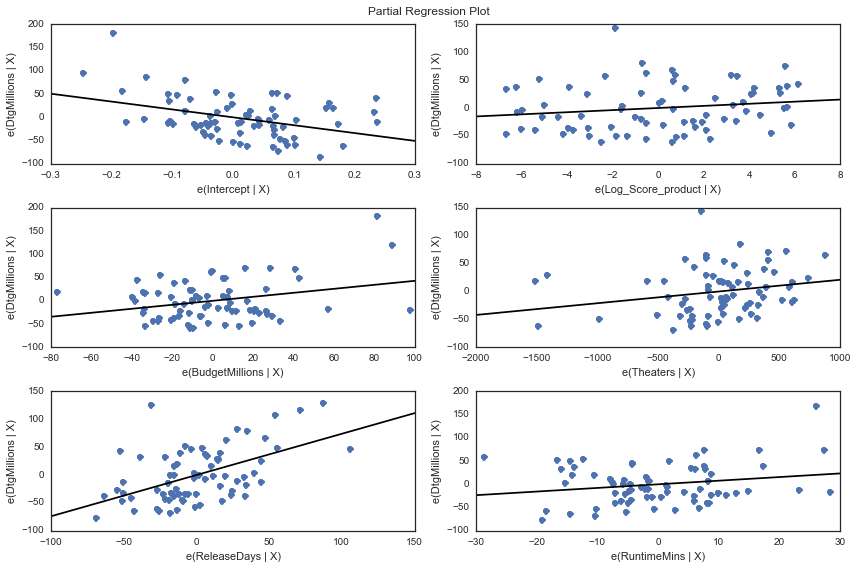

In [422]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ecf97d0>]], dtype=object)

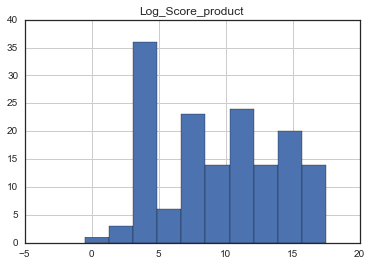

In [443]:
train.hist(column = 'Log_Score_product')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10eed80d0>]], dtype=object)

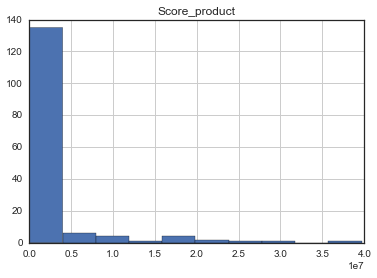

In [444]:
train.hist(column = 'Score_product')

In [468]:
error

,Fpval,aic,bic,coeff,num_obs,num_pred,r_sqr,r_sqr_adj,test_err,train_err
0,2.947329e-10,1697.024615,1703.072376,Intercept -1.935817 Log_Score_produc...,152,1,0.233248,0.228137,3393.792338,4025.654446
1,6.437668e-13,1276.275236,1284.536007,Intercept -0.106550 Log_Score_produc...,116,2,0.391549,0.380780,3257.960337,3336.813273
2,5.702819e-17,1222.692176,1233.601727,Intercept -92.354478 Log_Score_produ...,113,3,0.512929,0.499524,2663.333640,2728.783581
3,1.582223e-16,772.065100,783.585425,Intercept -96.477977 Log_Score_produ...,74,4,0.682519,0.664114,1411.859212,1737.669203
4,2.368681e-16,770.791439,784.615830,Intercept -169.200442 Log_Score_prod...,74,5,0.696258,0.673924,1354.868113,1662.472621
5,9.097608e-17,770.862717,782.383042,Intercept -164.944846 BudgetMillions ...,74,6,0.687636,0.669528,1524.339306,1709.662970
